# Cumulative Probability and Monte Carlo

In this week's studio we'll use the cumulative density function to estimate the probability of various events.  Then we'll use the Monte Carlo method to predict the probability distribution of a process with more than one source of uncertainty.  

Let's get uncertain!

We'll use a couple familiar libraries, and also [SciPy](https://scipy.org/) to handle some of our integrals. 

In [270]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

### Normal Distribution - Cumulative Probability

The normal distribution is a symmetric continuous probability distribution of a real-valued random variable.  The general form is:

$$\Large f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

Where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation.  

Let's plot the normal distrubtion for a specific value of $\mu$ and $\sigma$.

The distribution curve gives us the probability of a particulare outcome. However we are often interested in the probability that a measurement will exceed a certain value.  

For example, if we work in a facility that is filling bottles with juice we might have a target of filling each bottle with 12 oz of juice.  However there will be some variation in the operation of the equipment, so we won't get exactly 12 oz of juice.  As process engineers we might want to predict how often we will get a bottle with less than 11.75 oz of juice.  

For this type of problem we will need to calculate the cumulative probability.  The reason is that we don't know the exact value of the fill that is too low, so we want to know the probability of getting any value that is less than 11.75.  If we have run the process for a long time and have a good estimate for the population mean and standard deviation, then we can convert our target value to a $z$ value with the following formula.

$$ \Large z = \frac{x-\mu}{\sigma} $$

For example, if we knew that the mean value of the fill process was 12oz, and that the standard deviation of the fill process was 0.2oz, then we can calculate the $z$ value like this.

$$ \Large z = \frac{11.75oz-12oz}{0.2oz} = -1.25 $$

Once we have transformed our target outcome into a $z$ value, we can simply use the standard normal distribution to ($\mu=0, \sigma=1$) to perform our analysis.  All of the statistical tools  are built around the standard distribution.

The standard normal distribution has the following form:

$$\Large f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(z)^2} $$

In order to calculate the cumulative probability below a certain value, we have to integrate the normal distribution curve from $-\infty$ up to the $z$ value of interest.

$$\Large P(z<Z) = \int_{-\infty}^Z  \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(z)^2} dz$$



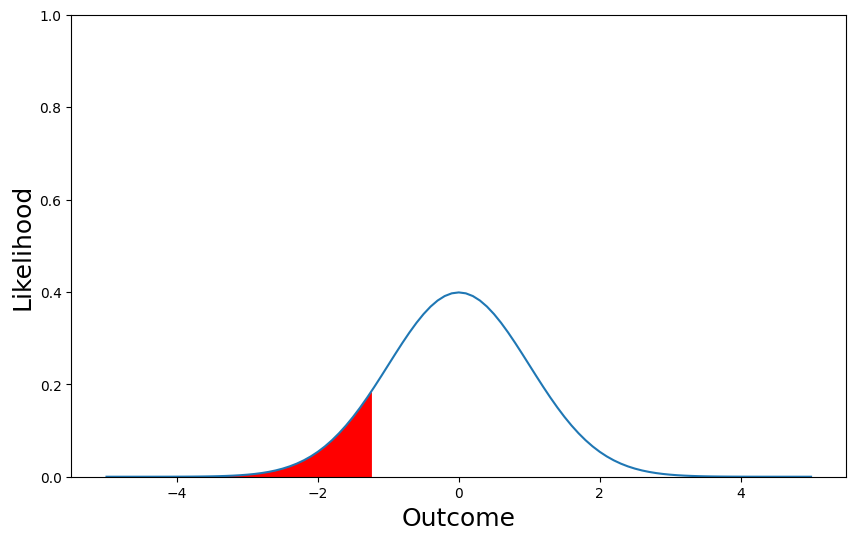

In [271]:
# make the figure 
plt.figure(figsize=(10,6))

# mean
mu = 0

# standard deviation
sigma = 1

# Z-value of measurement
Z = -1.25

# outcome space
x = np.linspace(-5,5,num=101)

# probability distribution
f = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x-mu)/sigma),2))
plt.plot(x,f)

# fill in cummulative region
x_sub = np.linspace(-5,Z,num=101)
f_sub = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x_sub-mu)/sigma),2))
plt.fill_between(x_sub,f_sub,color="red")

# format plot
plt.xlabel("Outcome",fontsize=18)
plt.ylabel("Likelihood",fontsize=18)
plt.ylim(0,1)
plt.show()

### Cumulative probability

The **norm.cdf()** function in **scipy.stats** will calculate the cumulative probability up to a certain $z$ value.  This is equivalent to the area shaded in red above.

```Python
st.norm.cdf(Z)
```

### Percentatge Point Function

The **norm.ppf()** function does the opposite of the cumulative probability function.  We can input a target cumulative probability and it will return the $z$ value.

```Python
st.norm.ppf(0.05)
```

## Cumulative Probability on the High Side

What happens if we want to know how likely it is that we get a measurement above a certain value?  Let's say we want to know the probability that we get a fill above $12.1oz$.

First we calculate our new $z$ value.

$$ \Large z = \frac{12.1oz-12oz}{0.2oz} = 0.5 $$

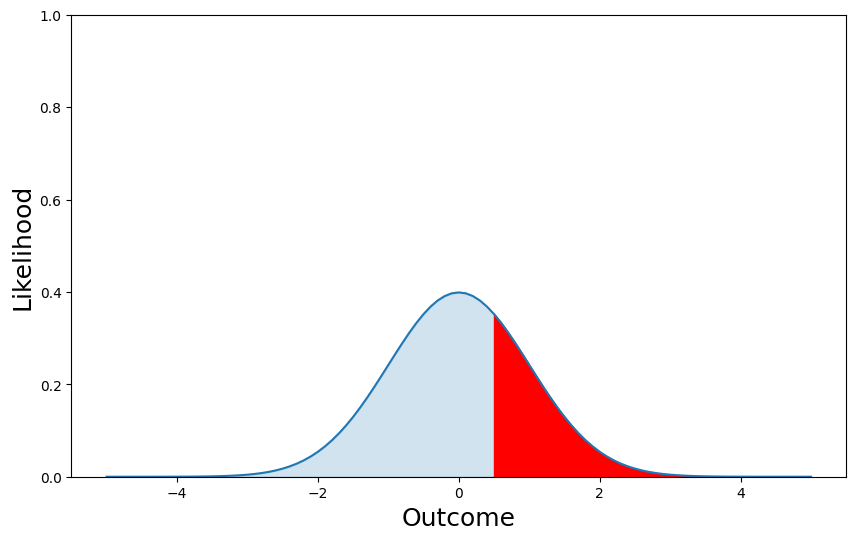

In [272]:
# make the figure 
plt.figure(figsize=(10,6))

# mean
mu = 0

# standard deviation
sigma = 1

# Z-value of measurement
Z = 0.5

# outcome space
x = np.linspace(-5,5,num=101)

# probability distribution
f = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x-mu)/sigma),2))
plt.plot(x,f)

# fill in cummulative region
x_sub = np.linspace(Z,5,num=101)
f_sub = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x_sub-mu)/sigma),2))
plt.fill_between(x,f,color="C0",alpha=0.2)
plt.fill_between(x_sub,f_sub,color="red")

# format plot
plt.xlabel("Outcome",fontsize=18)
plt.ylabel("Likelihood",fontsize=18)
plt.ylim(0,1)
plt.show()

In this case we know that the total probability is 1, so we can calculate the probability in the red region by calculating the probability in the blue region, and then subtracting that value from 1.

$$\Large P(z>Z) = 1 - P(z<Z)$$

We can accomplish this using the **norm.cdf()** function.

```Python
1-st.norm.cdf(Z)
```

What about the case where the measurements could vary above or below the mean?

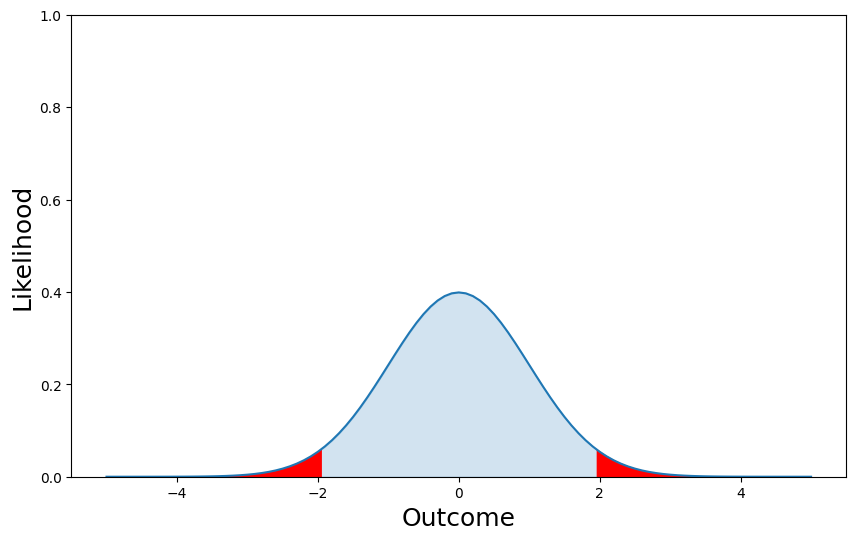

In [273]:
# make the figure 
plt.figure(figsize=(10,6))

# mean
mu = 0

# standard deviation
sigma = 1

# outcome space
x = np.linspace(-5,5,num=101)

# probability distribution
f = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x-mu)/sigma),2))
plt.plot(x,f)

# fill in cummulative region
plt.fill_between(x,f,color="C0",alpha=0.2)

Z = st.norm.ppf(0.025)
x_low = np.linspace(-5,Z,num=101)
f_low = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x_low-mu)/sigma),2))
plt.fill_between(x_low,f_low,color="red")

Z = st.norm.ppf(0.975)
x_high = np.linspace(Z,5,num=101)
f_high = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*np.power(((x_high-mu)/sigma),2))
plt.fill_between(x_high,f_high,color="red")

# format plot
plt.xlabel("Outcome",fontsize=18)
plt.ylabel("Likelihood",fontsize=18)
plt.ylim(0,1)
plt.show()

In this case, we need to first calculate the probability of being less than the high limit, then subtract the probability of being less than the low limit.  

Using the syntax we learned above, calculate $P(-2<Z<2)$  It's fine to use multiple lines of code if it's easier to read.  

## Monte Carlo Simulations

A [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) simulation is a method for estimating the probability distribution of a process with more than one source of uncertainty.  

We start with a deterministic calculation (one answer which depends on unchanging input variable values) and then use the random number generator to add some uncertainty to those values.  When we repeat the calculation multiple times, we see how the variation in each input variable combines to create some vriability in the outcome.  

Study the *Ideal Gas Law* simulation provided in the CANVAS page.  We were able to study the effect of variations in temperature and amount on the pressure in the gas cylinders.  The calculation is almost identical to the deterministic calculation.  The only difference is that inside the loop we use `np.random.randn()` to generate the values for $T$ and $n$.  

Since `np.random.randn()` samples from the standard normal distribution (Z), we can easily convert it into a normal distribution with just a little algebra.

$$ \Large z = \frac{x-\mu}{\sigma} \longrightarrow x = \sigma z + \mu$$

So we can type `x = sigma*np.random.randn() + mu` for any physical variable with a defined value for $\mu$ and $\sigma$.  

To explore the Monte Carlo method we should apply it to a problem that we're all familiar with.  And what's Adam's favorite process!?

The [Haber Process](https://en.wikipedia.org/wiki/Haber_process)!!!

#### Deterministic Calculations

We will feed nitrogen into system at a rate of 1 mol/min.  We will feed hydrogen into the system at a rate of 3 mol/min.  Ammonia will be produced according to the following reation.

$$N_2 + H_2 \longrightarrow 2NH_3$$

We will consider $N_2$ as species-A, $H_2$ as species-B, and $NH_3$ as species-C.

The fractional conversion of nitrogen is 0.18.

$$ f_{A} = \frac{\xi}{\dot{n}_{A,IN}} = 0.18$$

So we can solve for $\xi$ as:

$$ \xi = f_{A} \cdot \dot{n}_{A,IN}$$

From there we can write our familiar material balances.

$$ \dot{n}_{A,OUT} = \dot{n}_{A,IN} - \xi$$

$$ \dot{n}_{B,OUT} = \dot{n}_{B,IN} - 3\xi$$

$$ \dot{n}_{C,OUT} = 2\xi$$

Set up the calculation below to solve for the flow rates of each component out.  

In [274]:
def flow_finder(a_in, b_in, c_in, frac_con):

    species_a_in = a_in
    species_b_in = b_in
    species_c_in = c_in
    
    frac_con = frac_con
    xi = species_a_in * frac_con

    species_a_out = species_a_in - xi
    species_b_out = species_b_in - 3 * xi
    species_c_out = 2 * xi + species_c_in
    
    return species_a_out, species_b_out, species_c_out

given_a = 1
given_b = 3
given_c = 0
given_frac = 0.18
flow_rates_out = flow_finder(given_a, given_b, given_c, given_frac)


for x in range(len(flow_rates_out)):
    species = x + 1
    if species == 1:
        species = str('A')
    elif species == 2:
        species = str('B')
    elif species == 3:
        species = str('C')
    else:
        print('Species could not be identified from integer input or has exceeded inbuilt logic.')
        
    rate_rounder = flow_rates_out[x]
    flow_rate_out = np.round(rate_rounder, 2)
    
    print(f'\nThe flow rate of species {species} is {flow_rate_out}')


The flow rate of species A is 0.82

The flow rate of species B is 2.46

The flow rate of species C is 0.36


Now imagine that our fractional conversion has some uncertainty, and also that we can lose some of our reactants due to leaks in the feed.  

Assume that the fractional conversion has a mean of 0.17 and a standard deviation of 0.03.

Assume that the losses of the inlet gasses are on average $5\%$ with a standard deviation of 0.75\%.  However the losses cannot be negative.  

The losses will reduce the inlet flow rate of both nitrogen and hydrogen.

Set up a basic Monte Carlo Simulation to estimate the probability distribution of the flow rate of ammonia out of the system.

*This is a simplified model because we are applying the uncertainty directly to the fractional conversion.  In reality this is a $K_{eq}$ problem and we would apply the uncertainty to the temperature.  Then the change in both inlet components would contribute to the outcome.  But that would involve root-finding at every iteration.*

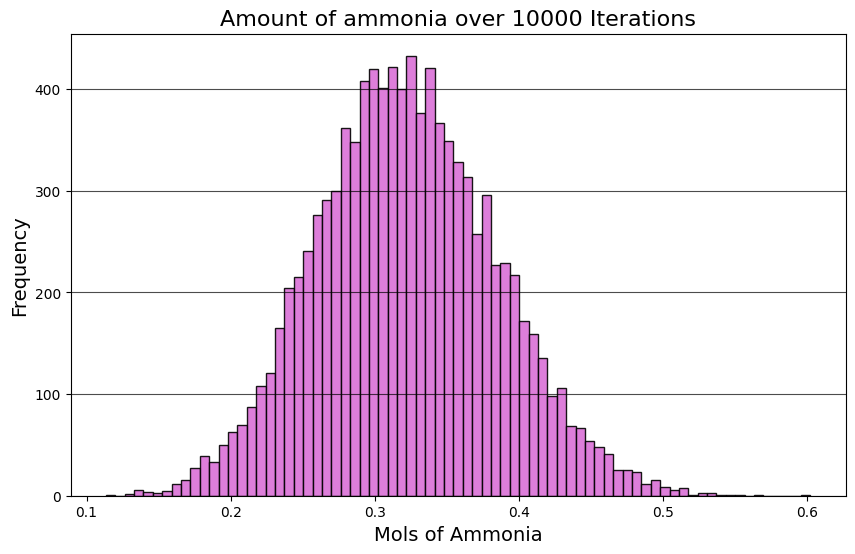

The probability of an amount of ammonia above 0.25 is 0.0038%


In [275]:
def data_collector(iterations):

    try:
        iterations = int(iterations)
    except Exception as e:
        print(f'Error with iteration conversion, make sure you input an integer. \n{e}')
    
    flow_rate_variables_dict = {}

    for i in range(iterations):
        
        frac_varied = 0.17 + 0.03 * np.random.randn()
        a_varied = (0.95 * given_a) + (0.075 * given_a) * np.random.randn() 
        b_varied = (0.95 * given_b) + (0.075 * given_b) * np.random.randn() 
        c_varied = (0.95 * given_c) + (0.075 * given_c) * np.random.randn() 
                
        flow_rates_out = flow_finder(a_varied, b_varied, c_varied, frac_varied)

        flow_rate_variables_dict[i] = {
            'A': flow_rates_out[0],
            'B': flow_rates_out[1],
            'C': flow_rates_out[2],
            'frac': frac_varied
        }

    def plot_histogram(flow_rate_variables_dict, iterations):
        
        frac_values = [entry['C'] for entry in flow_rate_variables_dict.values()]
        
        plt.figure(figsize=(10,6))
        plt.hist(frac_values, bins=75, color='orchid', edgecolor='black', alpha=0.9)
        plt.title(f'Amount of ammonia over {iterations} Iterations', fontsize=16)
        plt.xlabel('Mols of Ammonia', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(axis='y', alpha=0.7, color='black')
        plt.show()
        
    histogram = plot_histogram(flow_rate_variables_dict, iterations)
    
    z = (0.17 - 0.25)/ 0.03
    prob = st.norm.cdf(z)
    prob_rounded = np.round(prob, 4)
    print(f'The probability of an amount of ammonia above 0.25 is {prob_rounded}%')
    
    return flow_rate_variables_dict, histogram

dud_value = 10000
run_test = data_collector(dud_value)


From the histogram, estimate the probability of producing less than 0.25 mol/min ammonia. 

# Confidence Intervals

While we're already her, let's take this opportunity to start thinking about confidence intervals

If we know the ***population*** standard deviation, then we can use the z-table to get some intuition about confidence intervals.

$$\Large \mu = \bar{x} \pm z^* \frac{\sigma}{\sqrt{n}}$$

So for a given sample (set of measurements) we can calculate $\bar{x}$ and then find our critical $z^*$ and plug and chug to find the range for our confidence interval.  The confidence interval does not tell us much about the actual population, it simply gives us a range that is likely to include the population mean.  

Let's try a visualization.

The verical line is the population mean.  The dots are the sample means ($\bar{x}$), and the horizontal lines show the span of the confidence interval.  Run the cell several times.  Any sample which results in a CI that does not include the mean will be highlighted in red.  How often does that occur?  Now try changing the number of measurements per sample.  You can also try changing the level of significance ($\alpha$).

Out of 20 samples, 2 of the 95% confidence intervals did not include the true mean.


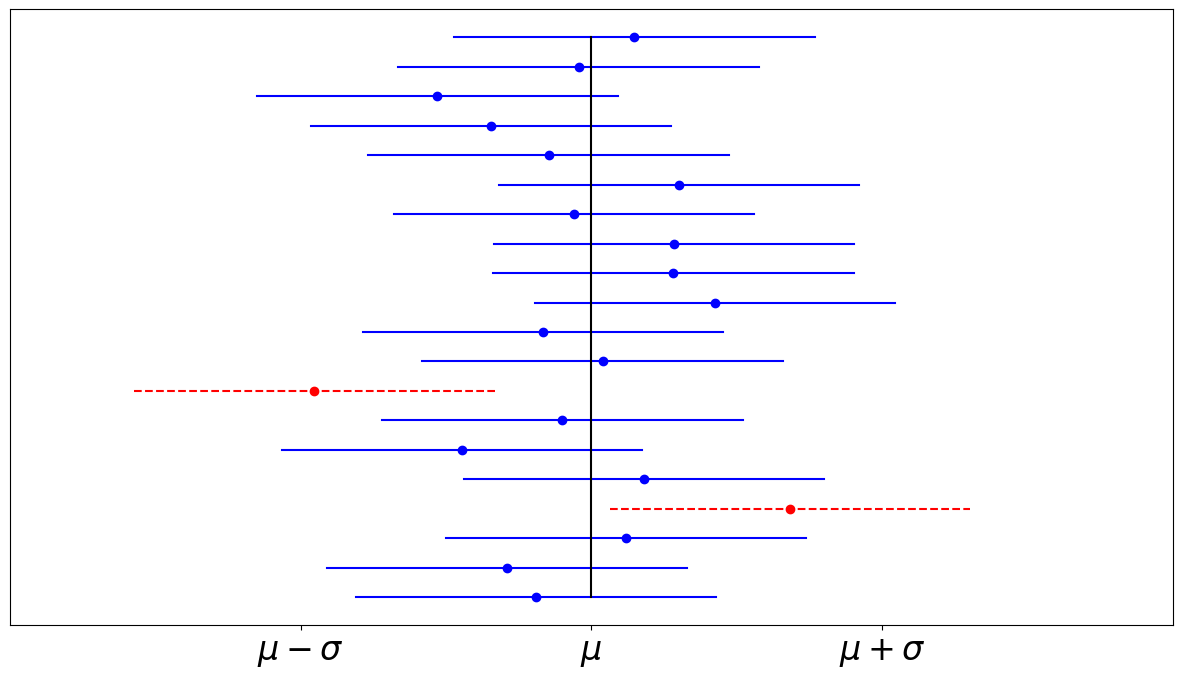

In [276]:
# z-score for 95% confidence interval
alpha = 0.05
z_star = st.norm.ppf((1-alpha/2))

# population mean
mu = 3

# population standard deviation
sigma = 1

# number of samples
n_samples = 20

# number of measurements per samples
n_meas = 10

# initialize counter for tracking samples which have a CI that
# does not include the mean
mean_not_included = 0

# intialize figure to set size
plt.figure(figsize=(15,8))

# loop for confidence intervals
for i in range(n_samples):
    
    # get sample
    sample = sigma*np.random.randn(n_meas) + mu
    
    # calculate sample mean
    x_bar = np.mean(sample)
    
    # calculate upper and lower bounds of confidence interval
    CI_upper = x_bar + z_star*sigma/np.sqrt(n_meas)
    CI_lower = x_bar - z_star*sigma/np.sqrt(n_meas)
    
    # color code the lines
    if (CI_upper > mu) and (CI_lower < mu):
    
        plt.plot(x_bar,i,'o',c="blue")
        plt.plot([CI_lower,CI_upper],[i,i],'-',c="blue")
        
    else:
        plt.plot(x_bar,i,'o',c="red")
        plt.plot([CI_lower,CI_upper],[i,i],'--',c="red")
        mean_not_included = mean_not_included + 1
    
# plot the mean
plt.plot([mu,mu],[0,i],c="black")

# format the plot
plt.xlim(1,5)
plt.yticks([],[])
plt.xticks([2,3,4],[r"$\mu-\sigma$",r"$\mu$",r"$\mu+\sigma$"],fontsize=24)

# report outside count
print("Out of {} samples, {} of the 95% confidence intervals did not include the true mean.".format(n_samples,mean_not_included))

But we're often not going to know the population standard deviation, so we will have to rely on the sample standard deviation as an estimate.  This will introduce some error, because the sample standard deviation is always calculated relative to the sample mean.  To account for this we use the t-distribution which has heavier tails to account for this extra uncertainty.


$$ \Large \mu = \bar{x} \pm t_{\alpha/2,\nu}^*\frac{s}{\sqrt{n}}$$

$$\Large \nu = n-1 $$

Let's run the same visualization again, but this time we will use the t-distribution and the sample standard deviation.

Out of 20 samples, 1 of the 95% confidence intervals did not include the true mean.


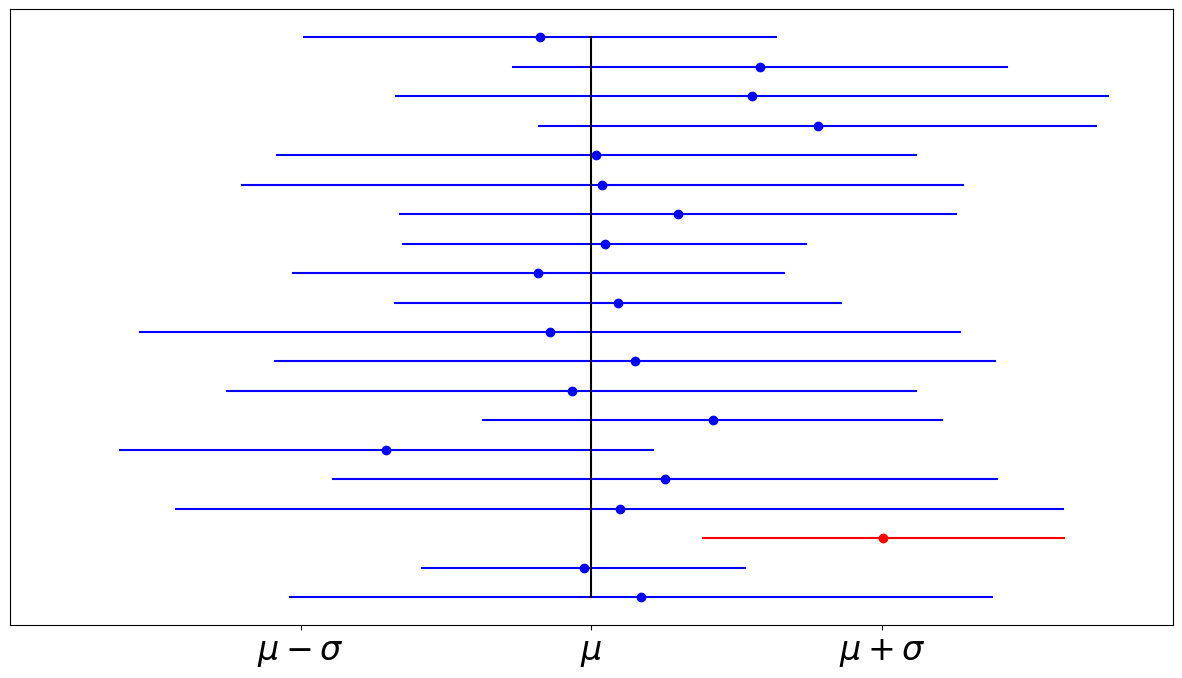

In [277]:
# population mean
mu = 3

# population standard deviation
sigma = 1

# number of samples and measurements per sample
n_samples = 20
n_meas = 5

# t-value for 95% confidence interval
alpha=0.05
t_star = st.t.ppf(q=(1-alpha/2),df=(n_meas-1))

# initialize counter for tracking samples which have a CI that
# does not include the mean
mean_not_included = 0

# intialize figure to set size
plt.figure(figsize=(15,8))

# loop for confidence intervals
for i in range(n_samples):
    
    # get the sample
    sample = sigma*np.random.randn(n_meas) + mu
    
    # calculate sample mean
    x_bar = np.mean(sample)
    
    # calculate sample standard deviation
    s = np.std(sample)
    
    # calculate confidence interval
    CI_upper = x_bar + t_star*s/np.sqrt(n_meas)
    CI_lower = x_bar - t_star*s/np.sqrt(n_meas)
    
    # check for mean
    if (CI_upper > mu) and (CI_lower < mu):
    
        plt.plot(x_bar,i,'o',c="blue")
        plt.plot([CI_lower,CI_upper],[i,i],c="blue")
        
    else:
        plt.plot(x_bar,i,'o',c="red")
        plt.plot([CI_lower,CI_upper],[i,i],c="red")
        mean_not_included = mean_not_included + 1
    
# plot the mean
plt.plot([mu,mu],[0,i],c="black")

# format the plot
plt.xlim(1,5)
plt.yticks([],[])
plt.xticks([2,3,4],[r"$\mu-\sigma$",r"$\mu$",r"$\mu+\sigma$"],fontsize=24)

# report outside count
print("Out of {} samples, {} of the 95% confidence intervals did not include the true mean.".format(n_samples,mean_not_included))

Notice how some means are far away, but because of the wide CI the mean is still included.  In other cases (depending on the particular batch of samples), we might actually have a smaple mean close to the population mean that is pretty close, but due to low standard deviation in that sample the population mean is not included in the interval.

Run the cell several times to look for a batch of samples where a red line has a sample mean closer to the population mean than a blue line.  

In the cell below, practice calculating a confidence interval for a sample of 5 measurements.  If your're feeling particularly rowdy you can pull the samples from the penguin data set that we used last week.  We know how to get a random sample!  Otherwise just do the calculation using `np.random.randn()`.  It is important that you be able to do this for a single sample, outside the loop.  This is one of the most common analytical processes that you will encounter in engineering.